In [18]:
import pandas as pd
import numpy as np
import os

In [19]:
data_folder = "../data"

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-23--12h-20m-47s',
 '2025-05-23--12h-20m-57s',
 '2025-05-23--12h-21m-01s',
 '2025-05-23--12h-21m-05s',
 '2025-05-23--12h-21m-09s',
 '2025-05-23--12h-21m-13s',
 '2025-05-23--12h-21m-17s',
 '2025-05-23--12h-21m-20s',
 '2025-05-23--12h-21m-24s',
 '2025-05-23--12h-21m-28s',
 '2025-05-23--12h-21m-32s',
 '2025-05-23--12h-21m-36s',
 '2025-05-23--12h-21m-40s',
 '2025-05-23--12h-21m-44s',
 '2025-05-23--12h-21m-48s',
 '2025-05-23--12h-21m-52s',
 '2025-05-23--12h-21m-56s',
 '2025-05-23--12h-22m-00s',
 '2025-05-23--12h-22m-04s',
 '2025-05-23--12h-22m-08s',
 '2025-05-23--12h-22m-12s',
 '2025-05-23--12h-22m-16s',
 '2025-05-23--12h-22m-20s',
 '2025-05-23--12h-22m-24s',
 '2025-05-23--12h-22m-28s',
 '2025-05-23--12h-22m-32s',
 '2025-05-23--12h-22m-36s',
 '2025-05-23--12h-22m-40s',
 '2025-05-23--12h-22m-45s',
 '2025-05-23--12h-22m-49s',
 '2025-05-23--12h-22m-53s',
 '2025-05-23--12h-22m-57s',
 '2025-05-23--12h-23m-01s',
 '2025-05-23--12h-23m-05s',
 '2025-05-23--12h-23m-09s',
 '2025-05-23--12h-23

In [20]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,theta_estimate,delta_phi_estimate,data_dir,theta,delta_phi
0,9.380308,73.548899,2025-05-23--12h-20m-47s,0.000000,0
1,9.857106,73.675241,2025-05-23--12h-20m-57s,0.053247,0
2,10.361889,78.076912,2025-05-23--12h-21m-01s,0.106495,0
3,12.037404,80.465161,2025-05-23--12h-21m-05s,0.159742,0
4,14.244035,78.418532,2025-05-23--12h-21m-09s,0.212989,0
5,15.868602,81.697449,2025-05-23--12h-21m-13s,0.266237,0
6,18.764255,81.363122,2025-05-23--12h-21m-17s,0.319484,0
7,20.869941,82.246580,2025-05-23--12h-21m-20s,0.372731,0
8,23.630711,83.046457,2025-05-23--12h-21m-24s,0.425979,0
9,26.806978,83.991745,2025-05-23--12h-21m-28s,0.479226,0


In [21]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,theta_estimate,delta_phi_estimate,data_dir,theta,delta_phi,theta_degrees,delta_phi_degrees
0,9.380308,73.548899,2025-05-23--12h-20m-47s,0.000000,0,0.000000,0.0
1,9.857106,73.675241,2025-05-23--12h-20m-57s,0.053247,0,3.050847,0.0
2,10.361889,78.076912,2025-05-23--12h-21m-01s,0.106495,0,6.101695,0.0
3,12.037404,80.465161,2025-05-23--12h-21m-05s,0.159742,0,9.152542,0.0
4,14.244035,78.418532,2025-05-23--12h-21m-09s,0.212989,0,12.203390,0.0
5,15.868602,81.697449,2025-05-23--12h-21m-13s,0.266237,0,15.254237,0.0
6,18.764255,81.363122,2025-05-23--12h-21m-17s,0.319484,0,18.305085,0.0
7,20.869941,82.246580,2025-05-23--12h-21m-20s,0.372731,0,21.355932,0.0
8,23.630711,83.046457,2025-05-23--12h-21m-24s,0.425979,0,24.406780,0.0
9,26.806978,83.991745,2025-05-23--12h-21m-28s,0.479226,0,27.457627,0.0


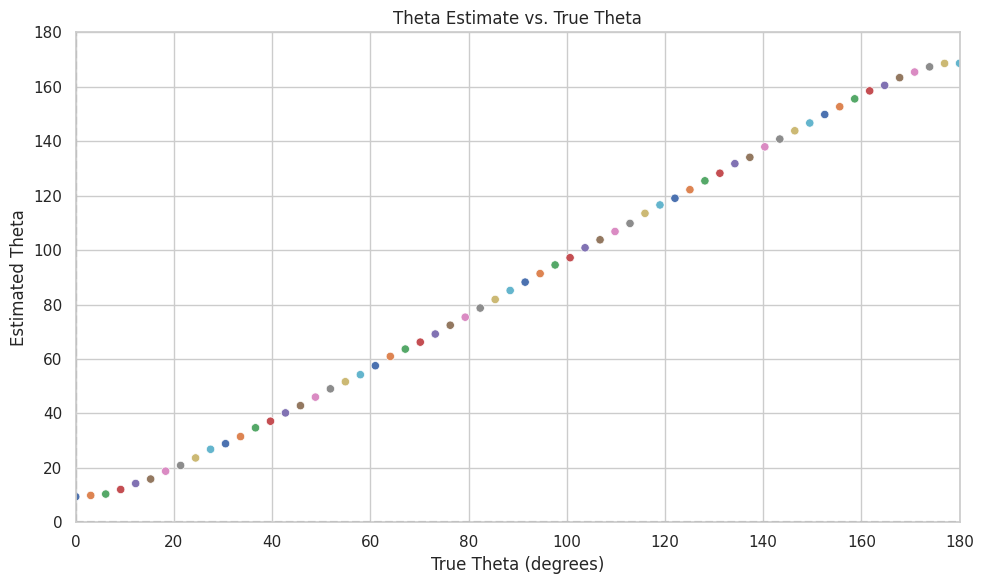

In [26]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta_degrees", y="theta_estimate", hue="data_dir", palette="deep")
plt.title("Theta Estimate vs. True Theta")
plt.xlabel("True Theta (degrees)")
plt.ylabel("Estimated Theta")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, 180)
plt.ylim(0, 180)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.savefig("theta_estimate_vs_true_theta.png", dpi=300)
plt.show()